In [30]:
import pickle
from deep_ion_registration.helpers.training_utils import TrainingLogger
import matplotlib.pyplot as plt
import numpy as np
from deep_ion_registration.helpers.plotting import compare_images
import glob
import os

def dict_to_numpy(dict):
    values = list(dict.values())
    keys = list(dict.keys())
    return np.array(values), np.array(keys)

In [31]:
model_dir = '/project/med6/IONCT/julian_titze'

In [34]:
# from model_dir load all loggers in all subdirectories
def load_loggers_from_directory(directory):
    # Find all .pkl files in directory and its subdirectories
    files = glob.glob(os.path.join(directory, '**', '*.pkl'), recursive=True)
    
    loggers = []
    for file in files:
        with open(file, 'rb') as f:
            logger = pickle.load(f)
            val_loss = logger.val_loss
            print(len(val_loss))
            
    return loggers



In [35]:
loggers = load_loggers_from_directory(model_dir)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xbb in position 5: ordinal not in range(128)

In [39]:
logger_path = '/project/med6/IONCT/julian_titze/models/2024-05-14_15-02-41/logger_0.pkl'

In [40]:
# load logger
with open(logger_path, 'rb') as f:
    logger = pickle.load(f)

In [41]:
val_loss = logger.val_loss
train_loss = logger.train_loss
val_examples = logger.val_examples
train_examples = logger.train_examples

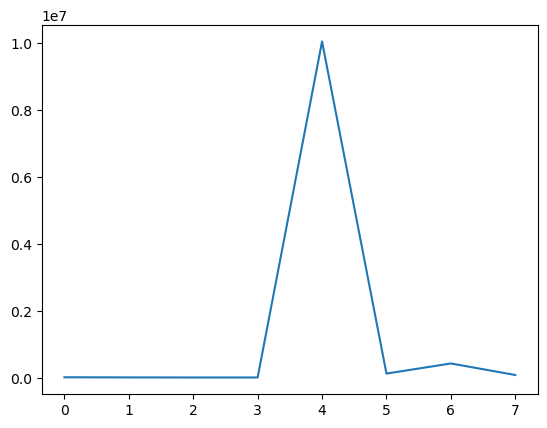

In [42]:
#val_loss dict to numpy 
val_loss_np, epochs = dict_to_numpy(val_loss)

plt.plot(epochs, val_loss_np)

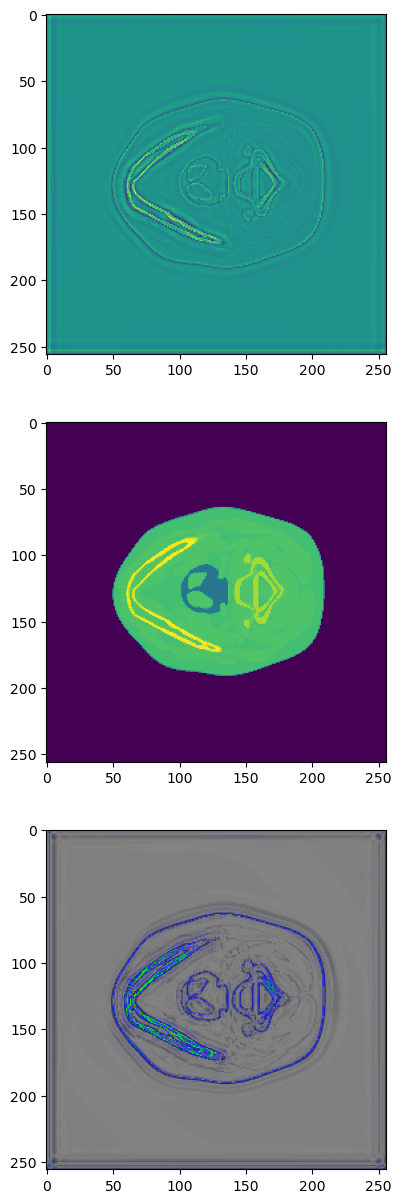

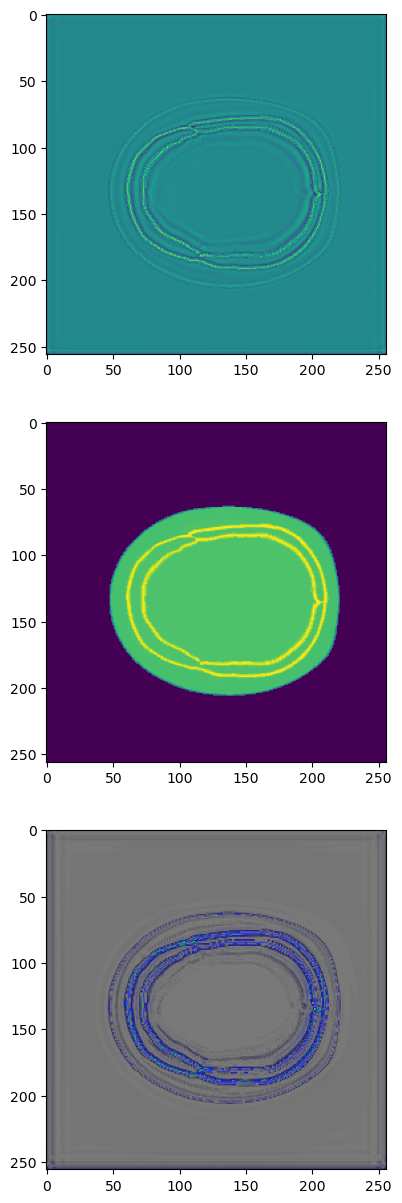

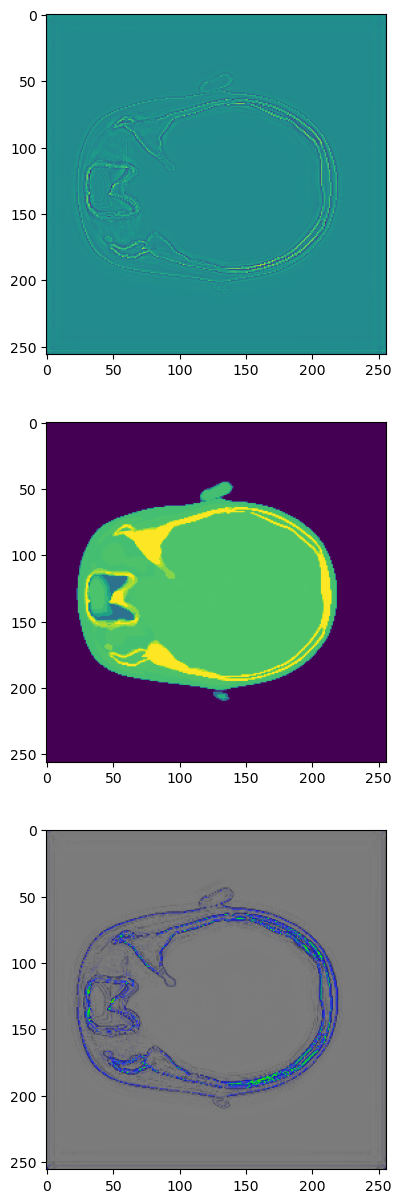

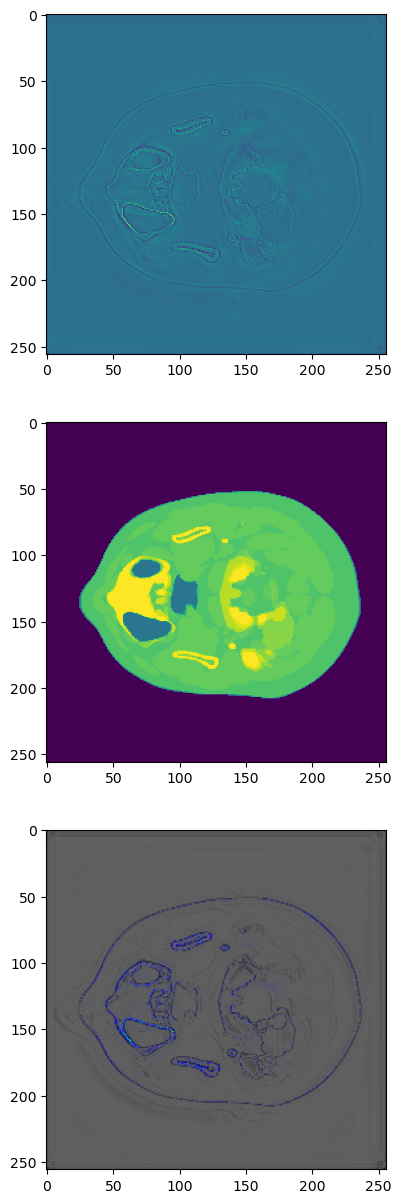

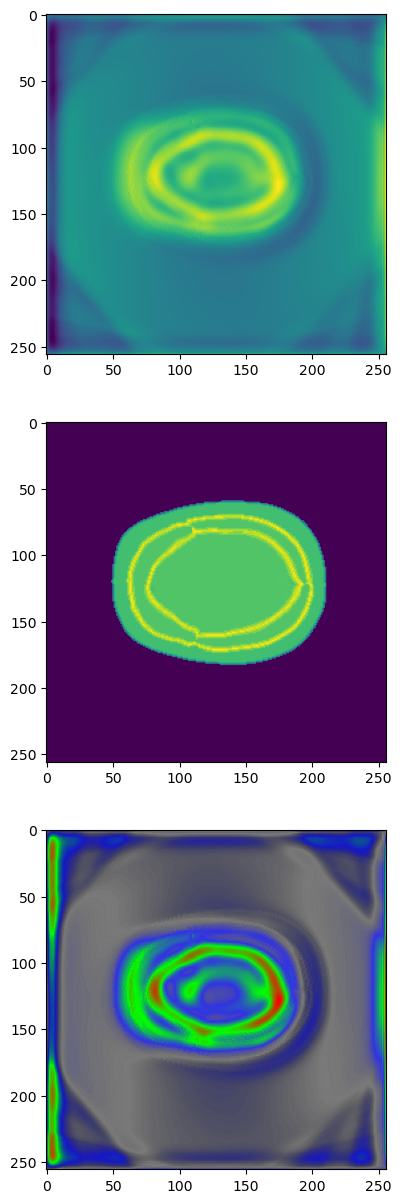

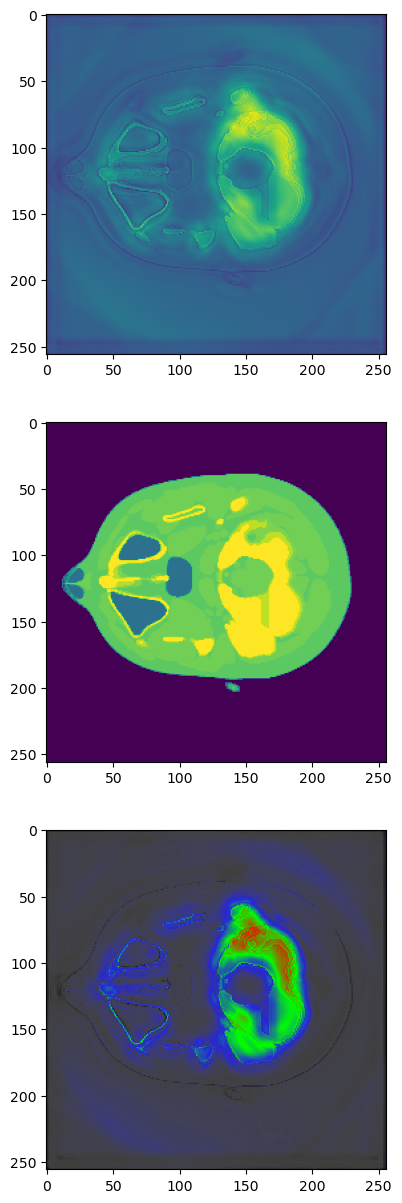

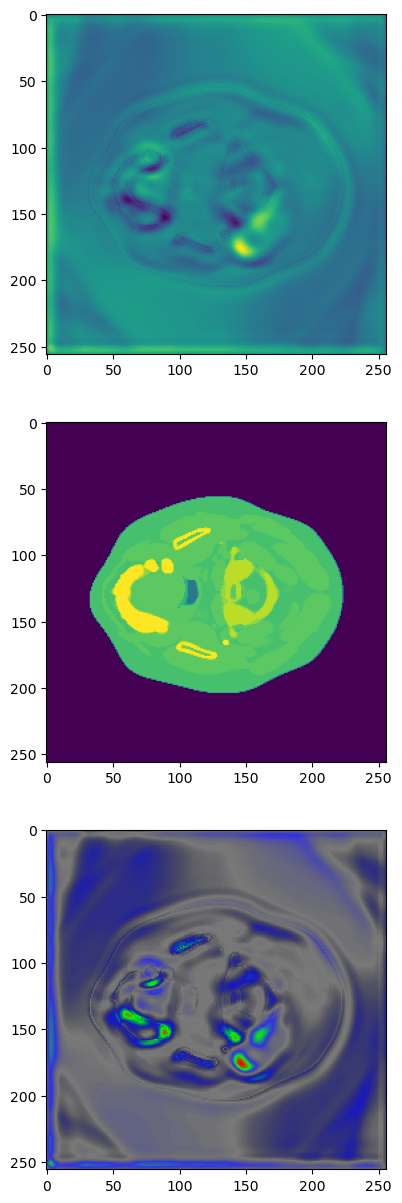

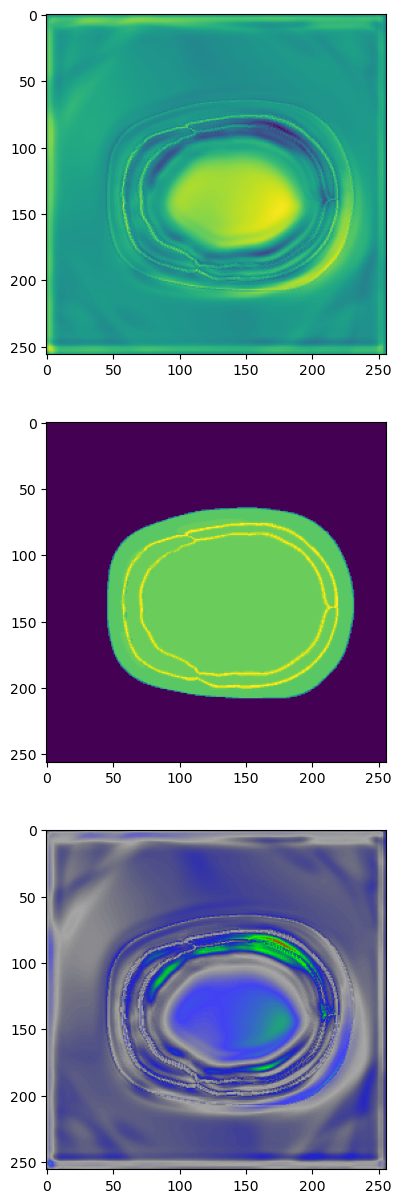

In [43]:
for key, value in train_examples.items():
    image_net = value[0][0,:,:]
    image_label = value[1][0,:,:]
    
    compare_images(image_net, image_label)